In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


df = pd.read_csv("../raw-dataset/merged.csv", usecols=[1, 2])

df.head()

,domain,class
0,crowdyfan.com,0
1,dreamaways.com,0
2,worldtravelserver.com,0
3,baarty.com,0
4,ladamotors63.ru,0


In [15]:
df['length'] = df['domain'].apply(lambda x: len(x))

In [16]:
df['nb_hyphen'] = df['domain'].apply(lambda x: x.count("-"))

In [17]:
df['nb_subdomains'] = df['domain'].apply(lambda x: x.count(".") - 1)

In [18]:
df['nb_cdn'] = df['domain'].apply(lambda x: x.count("cdn"))

In [19]:
def count_digits(string):
    occurence = 0
    for char in string:
        if char.isdigit() == True:
            occurence += 1
    return occurence

df['nb_digits'] = df['domain'].apply(count_digits)

In [20]:
def count_adword(string):
    occurence = 0
    
    if "ads" in string:
        occurence += 1
    elif "ad" in string:
        occurence += 1
    
    if "tracker" in string:
        occurence += 1
    
    return occurence

df['nb_adword'] = df['domain'].apply(count_adword)

In [21]:
def len_subdomain(string):
    subdomains = string.split(".")[:-2]
    return len(''.join(subdomains))

df["len_subomain"] = df['domain'].apply(len_subdomain)

In [22]:
def count_digits_subdomain(string):
    subdomains = string.split(".")[:-2]
    subdomain = ''.join(subdomains)
    return count_digits(subdomain)

df["nb_digits_subdomain"] = df['domain'].apply(count_digits_subdomain)

In [23]:
def plot_graph(columns):
    
    graph_data = {}
    
    for column in columns:
        graph_data[column] = [adservices[column].mean() , non_adservice[column].mean()]

    adservices_count = [graph_data[x][0] for x in graph_data]
    non_adservice_count = [graph_data[x][1] for x in graph_data]
    
    x = np.arange(len(columns)) 
    width = 0.35 

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, adservices_count, width, label='Phishing')
    rects2 = ax.bar(x + width/2, non_adservice_count, width, label='Legitimate')

    ax.set_ylabel('Count')
    ax.set_title('Features in dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(columns)
    ax.legend()

    fig.set_size_inches(18.5, 10.5)
    fig.tight_layout()
    plt.show()   

In [24]:
df.columns

Index(['domain', 'class', 'length', 'nb_hyphen', 'nb_subdomains', 'nb_cdn',
       'nb_digits', 'nb_adword', 'len_subomain', 'nb_digits_subdomain'],
      dtype='object')

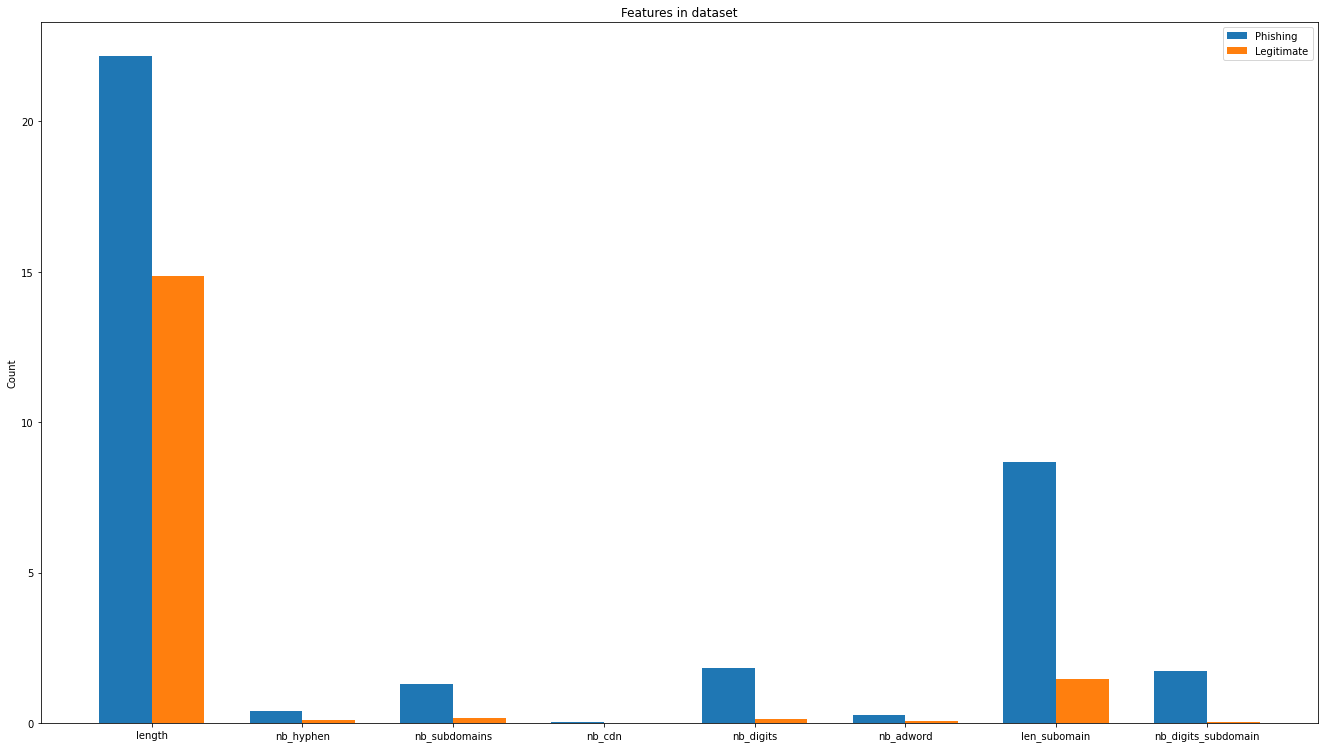

In [25]:
adservices = df[df['class'] == 1]
non_adservice = df[df['class'] == 0]

plot_graph(df.columns[2:])

In [26]:
adservices.head()

,domain,class,length,nb_hyphen,nb_subdomains,nb_cdn,nb_digits,nb_adword,len_subomain,nb_digits_subdomain
46229,0001-cab8-4c8c-43de.reporo.net,1,30,3,1,0,9,0,19,9
46230,002-slq-470.mktoresp.com,1,24,2,1,0,6,0,11,6
46231,004-btr-463.mktoresp.com,1,24,2,1,0,6,0,11,6
46232,005.free-counters.co.uk,1,23,1,2,0,3,0,16,3
46233,006.free-counters.co.uk,1,23,1,2,0,3,0,16,3


In [27]:
df.to_csv("../raw-dataset/feature-extracted.csv", index=False)

In [28]:
df

,domain,class,length,nb_hyphen,nb_subdomains,nb_cdn,nb_digits,nb_adword,len_subomain,nb_digits_subdomain
0,crowdyfan.com,0,13,0,0,0,0,0,0,0
1,dreamaways.com,0,14,0,0,0,0,0,0,0
2,worldtravelserver.com,0,21,0,0,0,0,0,0,0
3,baarty.com,0,10,0,0,0,0,0,0,0
4,ladamotors63.ru,0,15,0,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...
92453,yume.com,1,8,0,0,0,0,0,0,0
92454,zde-affinity.edgecaching.net,1,28,1,1,0,0,0,12,0
92455,zeepmedia.com,1,13,0,0,0,0,0,0,0
92456,zintext.com,1,11,0,0,0,0,0,0,0
